Import required libaries

In [87]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

Then we insert all the required connection properties

In [88]:
conn = pyodbc.connect('Driver={SQL Server};' # This is what server type we are connecting to
                      'Server=Desktop-QSI5H2G\SERVER1;' # This is the location and name of the server, same as what we use to connect using SSMS
                      'Database=AdventureWorks2019;' # This is which database we are connecting to within the selected server
                      'Trusted_Connection=yes;') # This allows us to forgo entering a trusted key or password because we are the admin of this computer and the...
                    # ... database has been configured to allow this user when we set it up. 

Now we create the cursor

In [89]:
cursor = conn.cursor()

Here we define what query we want executed in the database

In [90]:
query = 'SELECT E.JobTitle, AVG(E.SickLeaveHours) As Avg_SickLeaveHours FROM HumanResources.Employee AS E GROUP BY JobTitle ORDER BY Avg_SickLeaveHours DESC;'
query2 = 'SELECT * FROM jobtitle_sickleavehours ORDER BY Avg_SickLeaveHours DESC'
query3 = 'SELECT E.OrganizationLevel, AVG(E.SickLeaveHours) As Avg_SickLeaveHours FROM HumanResources.Employee AS E WHERE OrganizationLevel IS NOT NULL GROUP BY OrganizationLevel;'
query4 = 'SELECT E.JobTitle, E.OrganizationLevel FROM HumanResources.Employee AS E WHERE OrganizationLevel IN (1,3) GROUP BY JobTitle, OrganizationLevel ORDER BY E.OrganizationLevel;'

Here we assign the resulting table returned from the database as a variable 'salesdata'. 
This is also where our connection actually runs using the defined properties and query above

In [91]:
salesdata = pd.read_sql(query, conn)
jobtitleview = pd.read_sql(query2, conn)
categories = pd.read_sql(query3, conn)
organisationlevel = pd.read_sql(query4, conn)

C:\Users\elisa\AppData\Local\Temp\ipykernel_1132\788107028.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)
C:\Users\elisa\AppData\Local\Temp\ipykernel_1132\788107028.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  jobtitleview = pd.read_sql(query2, conn)
C:\Users\elisa\AppData\Local\Temp\ipykernel_1132\788107028.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  categories = pd.read_sql(query3, conn)
C:\Users\elisa\AppData\Local\Temp\ipykernel_1132\788107028.py:4: UserWarning: p

Let's get a preview of what our data looks like:

In [92]:
# Table of job title and sick leave
print(salesdata.head())
# Table of all three variables
print(jobtitleview.head())

                            JobTitle  Avg_SickLeaveHours
0            Chief Executive Officer                  69
1                            Stocker                  68
2       Shipping and Receiving Clerk                  67
3  Shipping and Receiving Supervisor                  66
4             Maintenance Supervisor                  66
                            JobTitle  OrganizationLevel  Avg_SickLeaveHours
0            Chief Executive Officer                NaN                  69
1                            Stocker                4.0                  68
2       Shipping and Receiving Clerk                4.0                  67
3  Shipping and Receiving Supervisor                3.0                  66
4             Maintenance Supervisor                3.0                  66


In [93]:
# Grouping by organisational level and looking at average sick leave hours
print(categories.head())
# Organisation level and the job title
print(organisationlevel.head())

   OrganizationLevel  Avg_SickLeaveHours
0                  1                  34
1                  2                  45
2                  3                  46
3                  4                  44
                        JobTitle  OrganizationLevel
0        Chief Financial Officer                  1
1   Information Services Manager                  1
2              Marketing Manager                  1
3  Vice President of Engineering                  1
4   Vice President of Production                  1


Lastly i create a scatter plot using two of the fields returned from the database

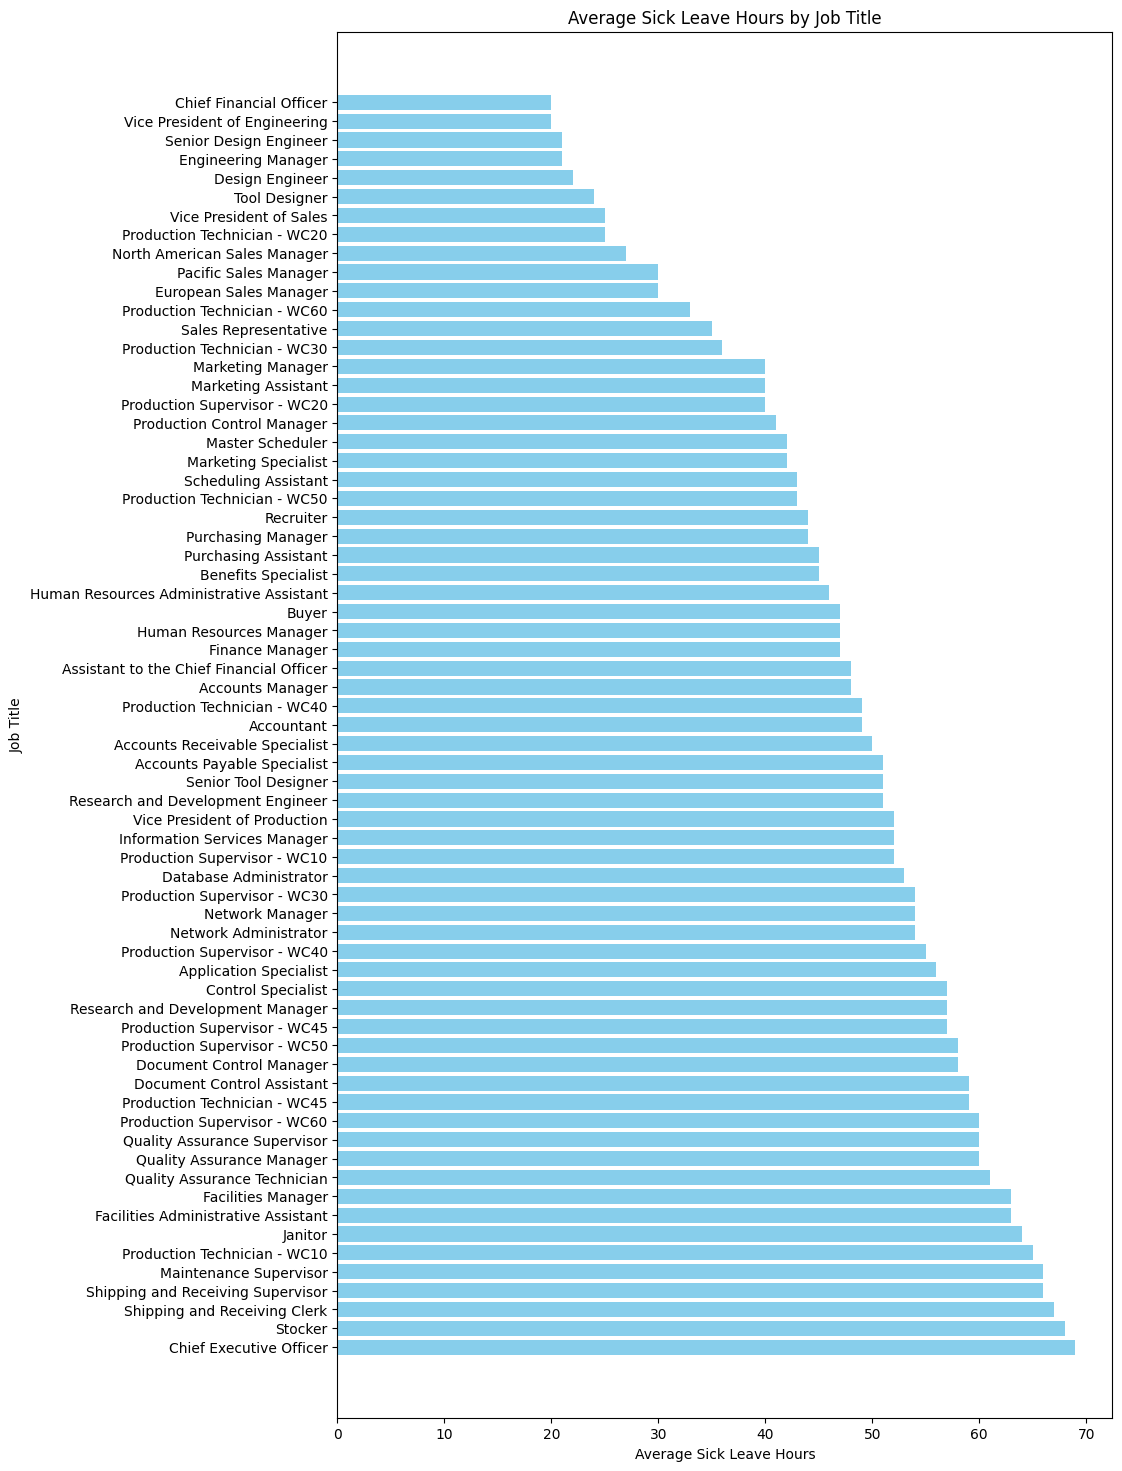

In [94]:
# Horizontal barchart of all the job titles and the average sick leave hours in descending order
plt.figure(figsize=(10, 18))  
plt.barh(salesdata.JobTitle, salesdata.Avg_SickLeaveHours, color = 'skyblue')
plt.xlabel('Average Sick Leave Hours')
plt.ylabel('Job Title')
plt.title('Average Sick Leave Hours by Job Title')
plt.show()


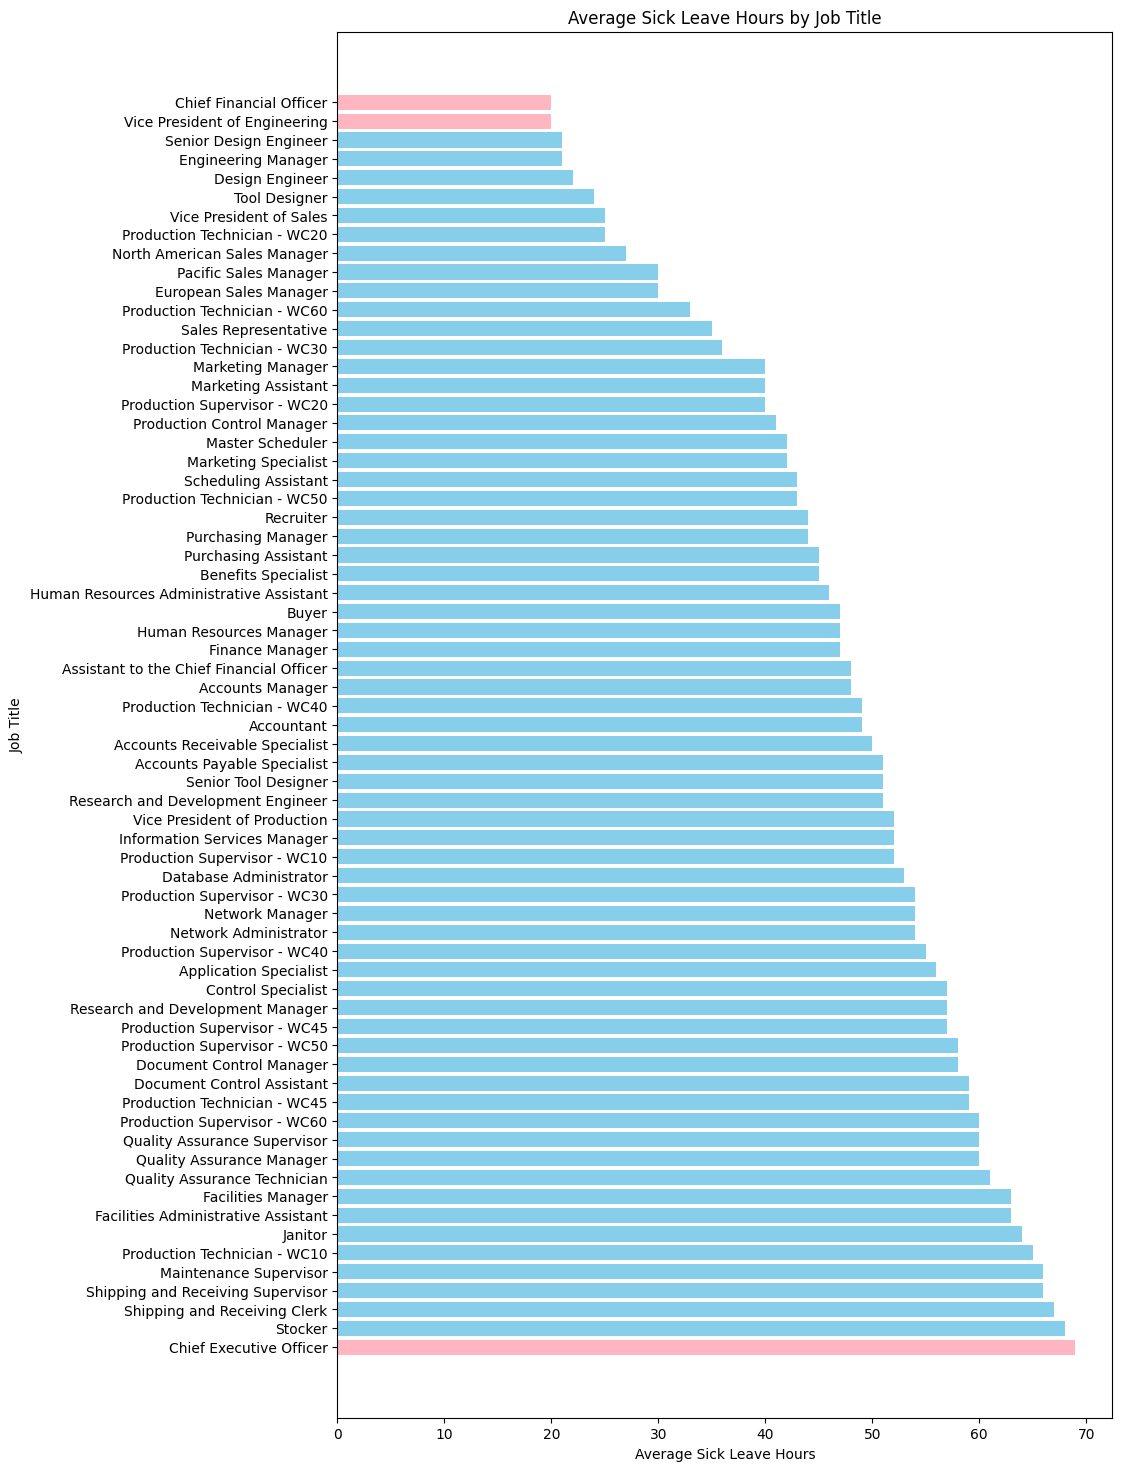

In [95]:
# A horizontal barchart duplicated but this one shows the job titles with the highest and lowest average sick leave hours 
colors = ['skyblue' if title not in ['Chief Financial Officer', 'Vice President of Engineering', 'Chief Executive Officer'] else 'lightpink' for title in salesdata.JobTitle]

plt.figure(figsize=(10, 18))  
plt.barh(salesdata.JobTitle, salesdata.Avg_SickLeaveHours, color = colors)
plt.xlabel('Average Sick Leave Hours')
plt.ylabel('Job Title')
plt.title('Average Sick Leave Hours by Job Title')
plt.show()

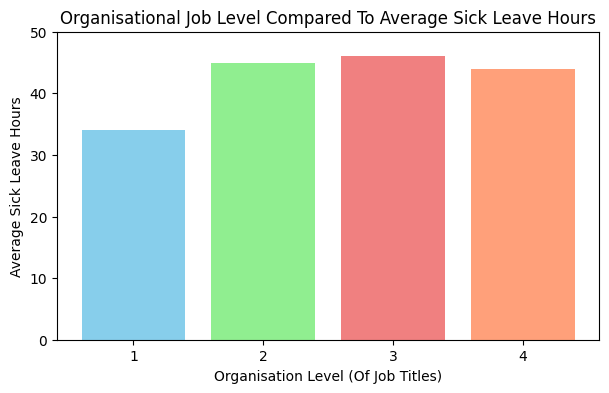

In [96]:
#Orgainsation Levels 1-4 of job titles vs average sick leave hours
x=['1','2','3','4']
y=[34, 45, 46, 44]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']
plt.figure(figsize=(7, 4))
plt.bar(x,y, color=colors)
plt.ylim(0, 50)
plt.title('Organisational Job Level Compared To Average Sick Leave Hours')
plt.xlabel('Organisation Level (Of Job Titles)')
plt.ylabel('Average Sick Leave Hours')
plt.show()

Now you can reverse engineer the code I have shown you above to create your own projects

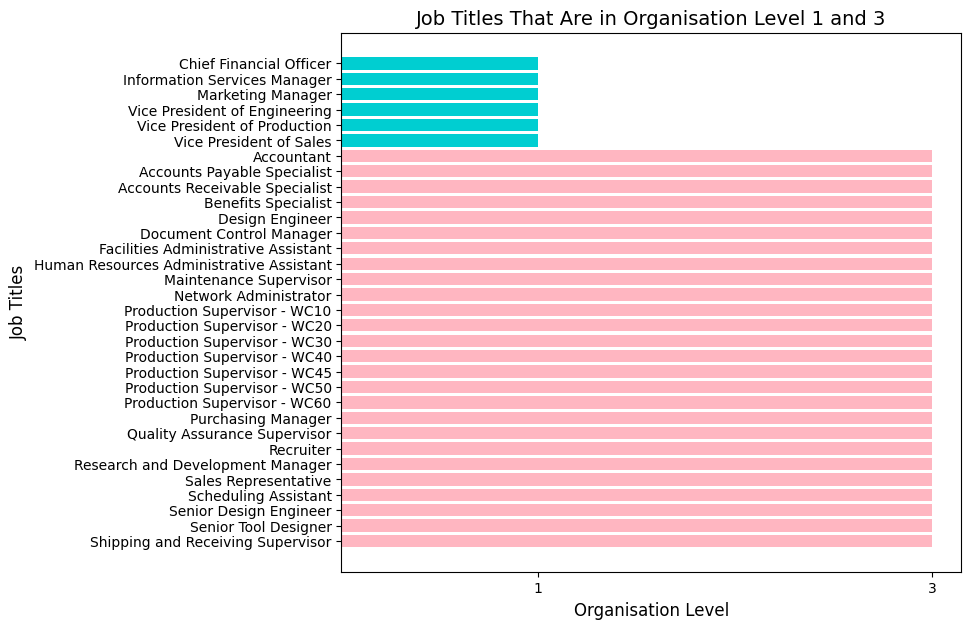

In [117]:
# A horizontal barchart showing the job titles in orgnisation levels 1 and 3
filtered_data = organisationlevel[organisationlevel.OrganizationLevel.isin([3, 1])]
colors = ['darkturquoise' if level == 1 else 'lightpink' for level in filtered_data.OrganizationLevel]
plt.figure(figsize=(8, 7))
plt.barh(filtered_data.JobTitle, filtered_data.OrganizationLevel, color=colors)
plt.gca().invert_yaxis()
plt.xlabel('Organisation Level', fontsize=12)
plt.ylabel('Job Titles', fontsize=12)
plt.title('Job Titles That Are in Organisation Level 1 and 3', fontsize=14)
plt.xticks([3, 1], fontsize=10)
plt.yticks(fontsize=10)

plt.show()
